Masukkan data yang terdiri dari waktu, keuntungan, dan kurs pada waktu tersebut

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Masukkan data
data = pd.read_csv('data mil.txt', sep=';', header=0, low_memory=False)
data.to_csv('data.csv')
dataset = pd.read_csv('data.csv')
dataset = pd.DataFrame(dataset)
df = dataset.drop(columns=['Unnamed: 0'])
df['waktu'] = pd.to_datetime(df.waktu)
df1 = pd.DataFrame(df, columns=['waktu', 'keuntungan'])
df

,waktu,keuntungan,kurs
0,2012-01-01,94616500,9074.000000
1,2012-01-02,12266000,9005.000000
2,2012-01-03,44482500,9112.000000
3,2012-01-04,123060000,9188.950195
4,2012-01-05,18914500,9410.000000
...,...,...,...
115,2021-01-08,10730500,14362.000000
116,2021-01-09,79428000,14385.000000
117,2021-01-10,23750000,14228.500000
118,2021-01-11,51213500,14377.000000


Menampilkan plot time series keuntungan vs kurs

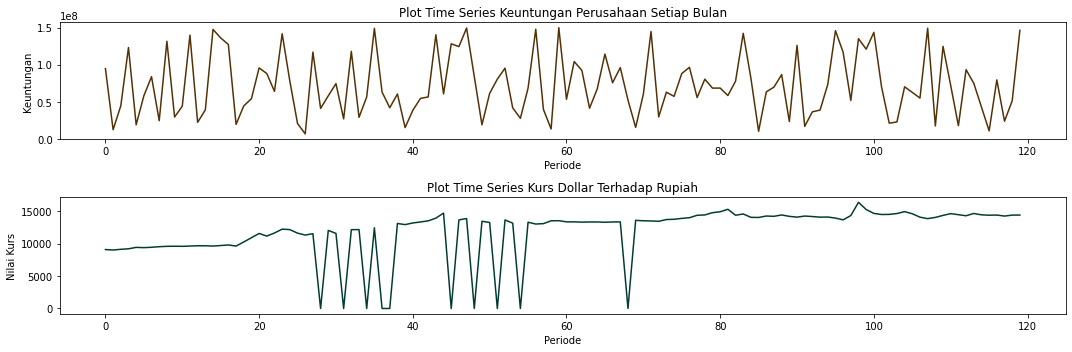

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
# Menampilkan plot time series data
plt.rcParams['figure.figsize'] = (35, 5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,12))

axa = df['keuntungan'].plot(colormap='BrBG',figsize=(15,5),title='Plot Time Series Keuntungan Perusahaan Setiap Bulan', ax=ax1);
axa.set_xlabel("Periode")
axa.set_ylabel("Keuntungan")
axb = df['kurs'].plot(colormap='BrBG_r',figsize=(15,5),title='Plot Time Series Kurs Dollar Terhadap Rupiah', ax=ax2);
axb.set_xlabel("Periode")
axb.set_ylabel("Nilai Kurs")
fig.tight_layout()

Membuat data training (insample) sebagai pembentuk model dan data test (outsample) sebagai uji kinerja model

In [ ]:
# Membuat data training dan test
train = df.keuntungan[:86]
test = df.keuntungan[84:]

Menampilkan plot time series data training

Text(0, 0.5, 'Jumlah')

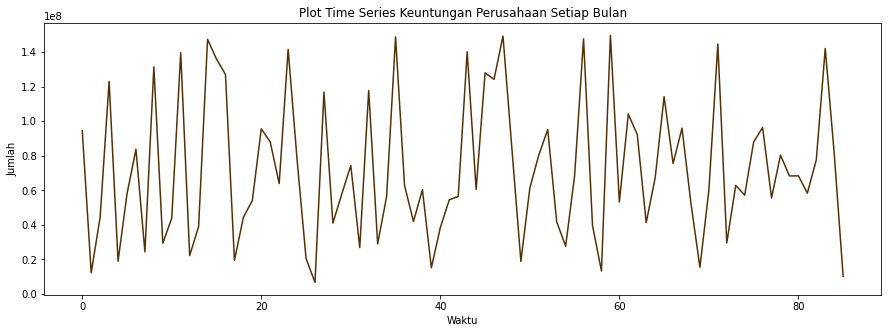

In [ ]:
import matplotlib as plt
# Menampilkan plot time series data
ax = train.plot(colormap='BrBG',figsize=(15,5),title='Plot Time Series Keuntungan Perusahaan Setiap Bulan');
ax.set_xlabel("Waktu")
ax.set_ylabel("Jumlah")

Melakukan uji-uji untuk menentukan model terbaik

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
# Uji stasioner dengan ADF Test
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.521553
p-value: 0.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


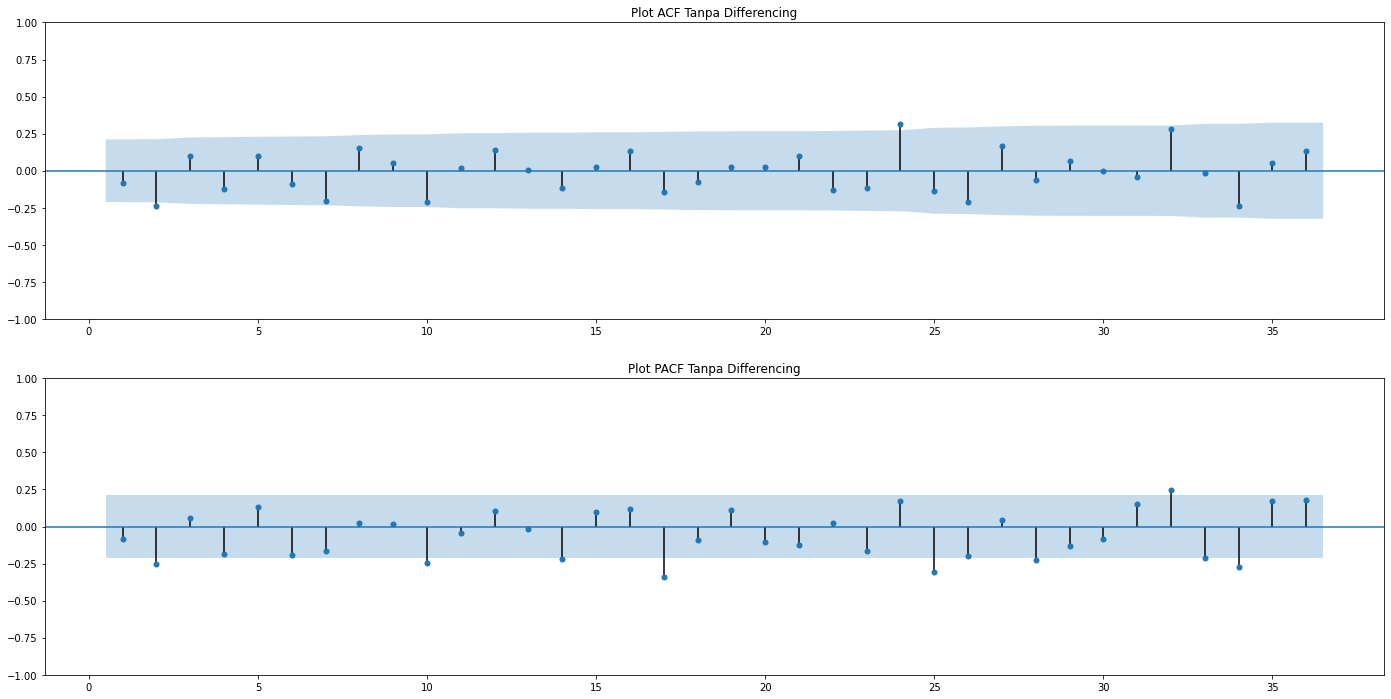

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (35, 5)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Membuat plot acf dan pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,12))

# Plot the ACF of Data Train
acf=plot_acf(train, lags=36, zero=False, ax=ax1, title='Plot ACF Tanpa Differencing');


# Plot the PACF of Data Train
pacf=plot_pacf(train, lags=36, zero=False, ax=ax2, title='Plot PACF Tanpa Differencing');

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


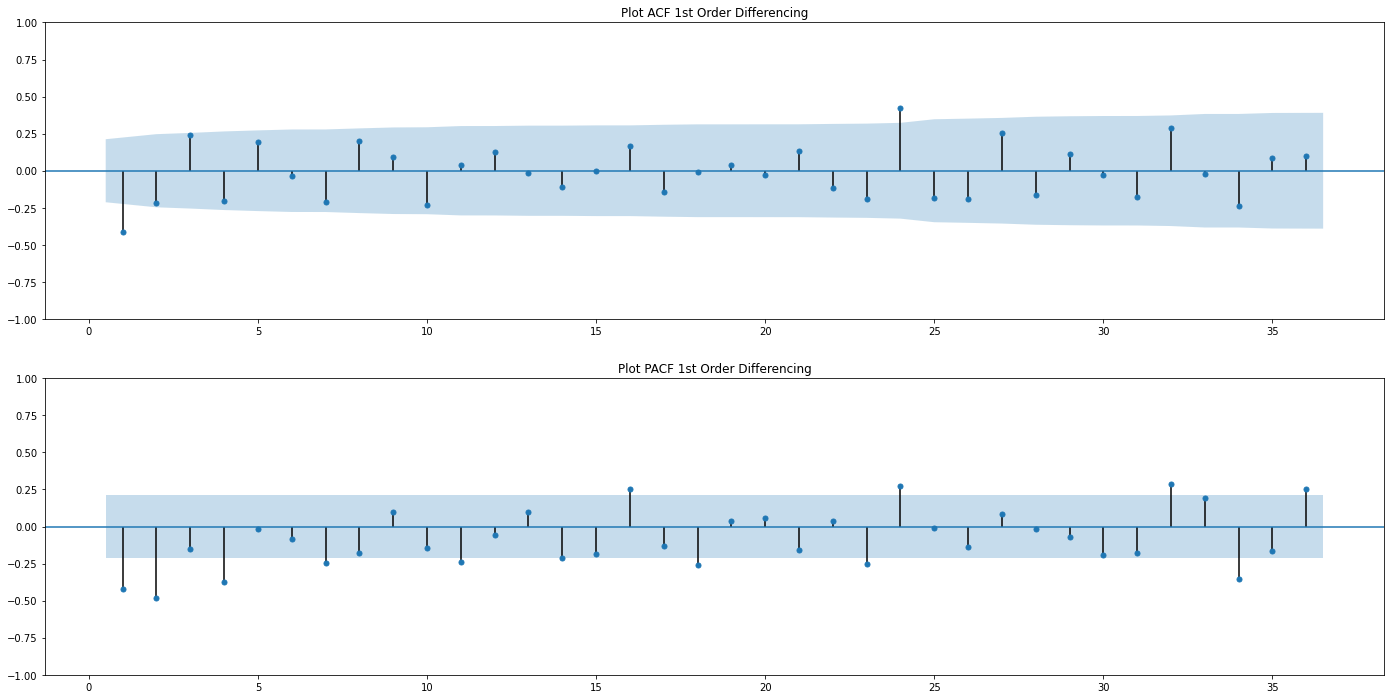

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (35, 5)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# difference data train
train1 = train.diff().dropna()

# Membuat plot acf dan pacf setelah di difference
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,12))

# Plot the ACF of Data Train1
acf1=plot_acf(train1, lags=36, zero=False, ax=ax1, title='Plot ACF 1st Order Differencing');


# Plot the PACF of Data Train1
pacf1=plot_pacf(train1, lags=36, zero=False, ax=ax2, title='Plot PACF 1st Order Differencing');

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 14.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train1, start_p=2, start_q=2,
                         test='adf',
                         max_p=2, max_q=2, m=12,
                         start_P=2, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=2799.320, Time=3.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2864.222, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2810.711, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2801.571, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2863.113, Time=0.02 sec
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=2797.324, Time=1.47 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=2798.891, Time=0.85 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=2798.213, Time=1.27 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=2799.189, Time=3.02 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=2819.476, Time=0.66 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=2798.177, Time=1.81 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=2798.372, Time=3.41 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=2800.981, Time=3.49 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=2796.549, Time=0.83 sec
 ARIMA(1,0,2)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   85
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -1391.013
Date:                              Sun, 19 Dec 2021   AIC                           2794.026
Time:                                      08:11:04   BIC                           2807.769
Sample:                                           0   HQIC                          2799.503
                                               - 85                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7097      1.001     -0.709      0.478      -2.672       1.252
ma.L1         -0.0862      0.937     -0.092      0.927      -1.922       1.750
ma.L2         -0.7645      0.857     -0.892      0.372      -2.444       0.915
ar.S.L12      -0.4017      0.445     -0.902      0.367      -1.275       0.471
ma.S.L12      -0.4993      0.515     -0.969      0.333      -1.509       0.511
sigma2       3.69e+15    1.2e-16   3.08e+31      0.000    3.69e+15    3.69e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.75   Prob(JB):                         0.47
Heteroskedasticity (H):               0.83   Skew:                             0.21
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.42e+48. Standard errors may be unstable.
"""

Diperoleh model terbaik yaitu ARIMA(1,0,2)(1,1,1)[12].
Selanjutnya kita akan menguji kinerja model dengan melihat persentase errornya, semakin kecil errornya semakin baik pula kinerjanya

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train1, order=(1,0,2),seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                           keuntungan   No. Observations:                   85
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -1391.013
Date:                              Sun, 19 Dec 2021   AIC                           2794.026
Time:                                      08:11:24   BIC                           2807.769
Sample:                                           0   HQIC                          2799.503
                                               - 85                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7097      1.001     -0.709      0.478      -2.672       1.252
ma.L1         -0.08

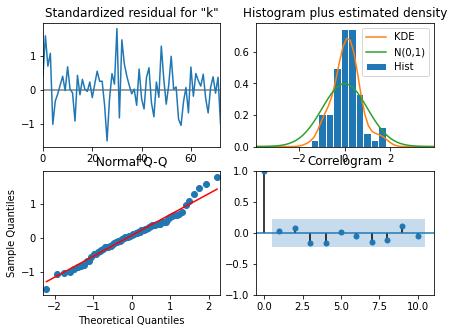

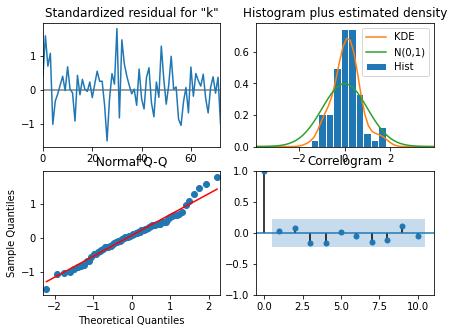

In [ ]:
# Plot residual errors
model_fit.plot_diagnostics(figsize=(7,5))

In [ ]:
# Forecast
forecast = model_fit.forecast(36)
actual = test

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
from statsmodels.tsa.stattools import acf

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [ ]:
forecast_accuracy(fc, test.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


{'acf1': nan,
 'corr': 0.260232247046621,
 'mae': 72547010.65721138,
 'mape': 1.2424676376352743,
 'me': -70572587.5225424,
 'minmax': 1.1666023118711826,
 'mpe': -1.0475013954442032,
 'rmse': 87454624.22749653}

Diperoleh error yang cukup kecil, dimana pada uji ini kita cukup melihat nilai MAPE nya saja sebagai ukuran ketepatan peramalan, dimana disitu nilai MAPE = 1,24% yang artinya kinerja model sangat baik dimana berada dibawah 10% sehingga model dapat dilanjutkan hingga peramalan dengan data asli.
Sehingga selanjutnya dilakukan peramalan dengan data asli.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(df1['keuntungan'], order=(1,0,2),seasonal_order=(1,1,1,12))
results = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


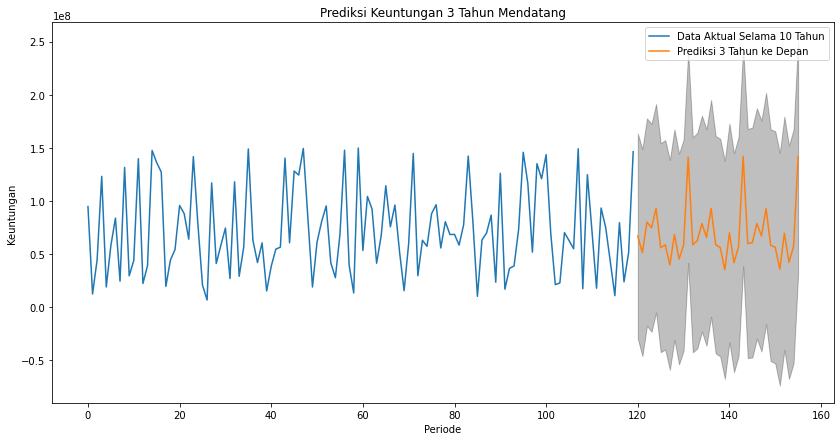

In [ ]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = df1['keuntungan'].plot(label='Data Aktual Selama 10 Tahun', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Prediksi 3 Tahun ke Depan')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Periode')
ax.set_ylabel('Keuntungan')
plt.title('Prediksi Keuntungan 3 Tahun Mendatang')
plt.legend()
plt.show()


Terlihat pada plot, keuntungan 3 tahun kedepan mengalami fluktuasi yang sama seperti periode sebelumnya, yaitu mencapai keuntungan max di akhir tahun kemudian kembali ke rata-rata, hal ini perlu diperhatikan untuk menstabilkan keuntungan max di masa mendatang.